In [53]:
import pandas as pd
import numpy as np

In [54]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [55]:
df=pd.read_csv("cgfinal414.csv")

In [56]:
df.shape

(414, 32)

In [57]:
df.columns.values

array(['id', 'StudyArm', 'Age', 'Gender', 'gradecat', 'incomecat',
       'racecat', 'Living', 'relationship_cat', 'GI_Lung', 'TTC3', 'TTC5',
       'TTC6a', 'TTC6b', 'TTC6c', 'TTC6d', 'distress',
       'ImpairedPolypharmacy', 'cognition', 'nutrition',
       'phy_performance', 'function', 'ImpairedCom', 'psychological',
       'ImpairedMS', 'calcimpairedCom', 'cgdistress', 'cggad7', 'cgphq2',
       'SF12total', 'AGG_PHYS', 'AGG_MENT'], dtype=object)

In [58]:
df.isna().sum()

id                       0
StudyArm                 0
Age                      3
Gender                   3
gradecat                 3
incomecat                4
racecat                  3
Living                   4
relationship_cat         3
GI_Lung                  1
TTC3                     1
TTC5                     1
TTC6a                    1
TTC6b                    1
TTC6c                    1
TTC6d                    6
distress                 6
ImpairedPolypharmacy     0
cognition                0
nutrition                0
phy_performance          0
function                 0
ImpairedCom              0
psychological            0
ImpairedMS               0
calcimpairedCom          3
cgdistress               7
cggad7                  17
cgphq2                  17
SF12total               18
AGG_PHYS                18
AGG_MENT                18
dtype: int64

In [59]:
df.cgdistress.value_counts()

0.0    230
1.0    177
Name: cgdistress, dtype: int64

In [60]:
df.cggad7.value_counts()

0.0    300
1.0     97
Name: cggad7, dtype: int64

In [61]:
df.cgphq2.value_counts()

0.0    322
1.0     75
Name: cgphq2, dtype: int64

In [62]:
df_cgd=df.iloc[:,:-5]

In [86]:
df_cgd.shape

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [64]:
df_cgd.isna().sum()

id                      0
StudyArm                0
Age                     3
Gender                  3
gradecat                3
incomecat               4
racecat                 3
Living                  4
relationship_cat        3
GI_Lung                 1
TTC3                    1
TTC5                    1
TTC6a                   1
TTC6b                   1
TTC6c                   1
TTC6d                   6
distress                6
ImpairedPolypharmacy    0
cognition               0
nutrition               0
phy_performance         0
function                0
ImpairedCom             0
psychological           0
ImpairedMS              0
calcimpairedCom         3
cgdistress              7
dtype: int64

In [65]:
df_cgd.dropna().shape

(398, 27)

In [66]:
df_cgd=df_cgd.dropna()

In [67]:
df_cgd['cgdistress']=df_cgd.cgdistress.astype('int')

In [68]:
df_cgd.cgdistress.value_counts()

0    226
1    172
Name: cgdistress, dtype: int64

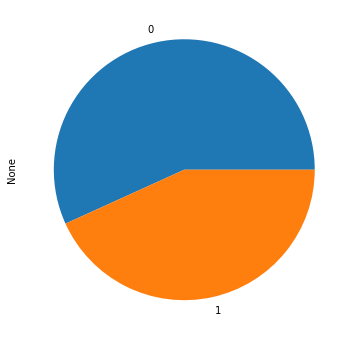

In [69]:
import matplotlib.pyplot as plt

df_cgd.cgdistress.astype('str').str.get_dummies().sum().plot.pie(figsize=(6, 6))

In [70]:
df_cgd.columns.values

array(['id', 'StudyArm', 'Age', 'Gender', 'gradecat', 'incomecat',
       'racecat', 'Living', 'relationship_cat', 'GI_Lung', 'TTC3', 'TTC5',
       'TTC6a', 'TTC6b', 'TTC6c', 'TTC6d', 'distress',
       'ImpairedPolypharmacy', 'cognition', 'nutrition',
       'phy_performance', 'function', 'ImpairedCom', 'psychological',
       'ImpairedMS', 'calcimpairedCom', 'cgdistress'], dtype=object)

In [71]:
df_cgd=df_cgd.drop(['id'],axis=1)

In [88]:
one_hot = pd.get_dummies(df_cgd['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

In [89]:
df_cgd

,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,cognition,nutrition,phy_performance,function,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,cgdistress,Control,GA
6,68.0,0.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,0,0,0.0,1,0,1
7,69.0,0.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,1,1,0,0,1.0,0,0,1
8,57.0,0.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,0,0,0,0.0,0,0,1
9,66.0,0.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0,1,1,1,0,1,0,1.0,1,0,1
10,71.0,0.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0,1,1,1,0,0,1.0,1,0,1
11,52.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,1,0,0.0,1,1,0
12,70.0,0.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0.0,0,0,1
13,48.0,0.0,2.0,3.0,1.0,2.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,1,1,0,0,1,0.0,0,0,1
14,32.0,0.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,1,0,0,0,1.0,1,1,0
15,65.0,0.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,1,1,1,1,0,0.0,1,0,1


In [ ]:
plt.figure(figsize = (100,100))
corr = df_cgd.corr(method='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=72
);
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=72
);
       

In [49]:
dtrain=df_cgd


In [81]:
features_selected = [ 'Control','GA', 'Age', 'Gender', 'gradecat', 'incomecat',
       'racecat', 'Living', 'relationship_cat', 'GI_Lung', 'TTC3', 'TTC5',
       'TTC6a', 'TTC6b', 'TTC6c', 'TTC6d', 'distress',
       'ImpairedPolypharmacy', 'cognition', 'nutrition',
       'phy_performance', 'function', 'ImpairedCom', 'psychological',
       'ImpairedMS', 'calcimpairedCom', 'cgdistress']
#for now we use all the features for regression
#features_selected=[features_selected[i] for i in [38,42,45,47,5,19,13,22,25,20]]

Xtrain = []
for i in features_selected:
    Xtrain.append(dtrain[i].values)

Xtrain = np.array(Xtrain)
Xtrain=Xtrain.T
predicted_feature = ['cgdistress']
Ytrain= []
for i in predicted_feature:
    Ytrain.append(dtrain[i].values)


Ytrain = np.array(Ytrain)
Ytrain=Ytrain.T.ravel()

# Xtest = []
# for i in features_selected:
#     Xtest.append(dtest[i].values)

# Xtest = np.array(Xtest)
# Xtest=Xtest.T
# predicted_feature = ['def_total']
# Ytest= []
# for i in predicted_feature:
#     Ytest.append(dtest[i].values)


# Ytest = np.array(Ytest)
# Ytest=Ytest.T.ravel()

In [84]:
Xtrain

array([['GA', 68.0, 0.0, ..., 0, 0.0, 1],
       ['GA', 69.0, 0.0, ..., 0, 1.0, 0],
       ['GA', 57.0, 0.0, ..., 0, 0.0, 0],
       ...,
       ['GA', 75.0, 0.0, ..., 0, 1.0, 1],
       ['GA', 67.0, 0.0, ..., 0, 1.0, 0],
       ['Control', 75.0, 0.0, ..., 0, 0.0, 0]], dtype=object)

In [82]:
Ytrain.shape

(398,)

In [83]:
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import GridSearchCV
model = RF(n_jobs=-1, random_state=42, verbose=2)

grid = {
        'max_features': ['auto', 'sqrt',0.05, 0.07,0.13, 0.15, 0.19, 0.25],
        'n_estimators': [10, 13, 25,45, 60,110, 148, 200],
        'min_samples_split': [2, 3, 5, 8, 12],
         'min_samples_leaf': [1, 2, 4,8],
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 60,None]
       }

rf_gridsearch = GridSearchCV(estimator=model, param_grid=grid, n_jobs=5, 
                             cv=5, verbose=2, return_train_score=True,scoring="accuracy")

rf_gridsearch.fit(Xtrain,Ytrain)

df_gridsearch = pd.DataFrame(rf_gridsearch.cv_results_)

Fitting 5 folds for each of 24192 candidates, totalling 120960 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  32 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 9226 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done 35210 tasks      | elapsed:   13.2s


KeyboardInterrupt: 